## Generating Synthetic Data for Clustering

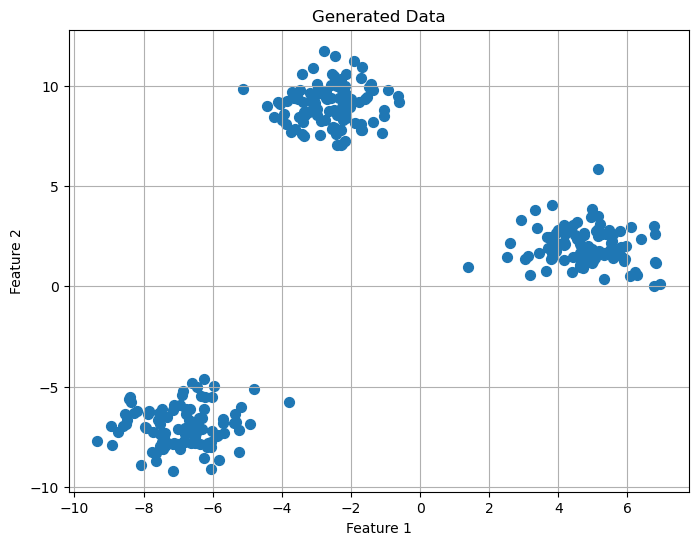

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Step 2: Generate sample data
# Let's generate some random data for demonstration purposes
# You can replace this with your own dataset
n_samples = 300
random_state = 42
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

# Step 3: Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()




## Performing Feature Scaling

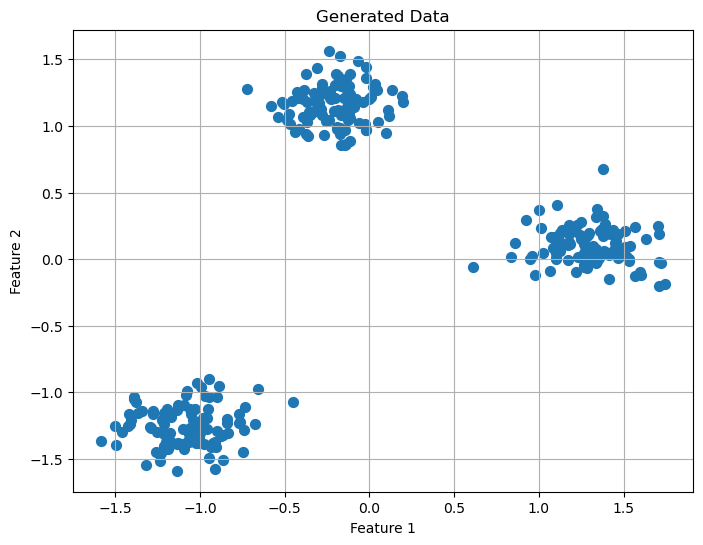

In [2]:
# Step 4: Feature Scaling
# Feature scaling is important for K-means clustering to ensure that all features contribute equally to the distance calculations.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Performing KMean Clustering with scikit-learn

In [3]:
# Step 5: Perform K-means clustering
# Initialize the KMeans model with desired number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Step 6: Visualize the clustered data
# Assign each data point to its respective cluster
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_




c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
!pip install threadpoolctl==3.1.0

#restart and run all
#https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute

## Visualizing Clusters

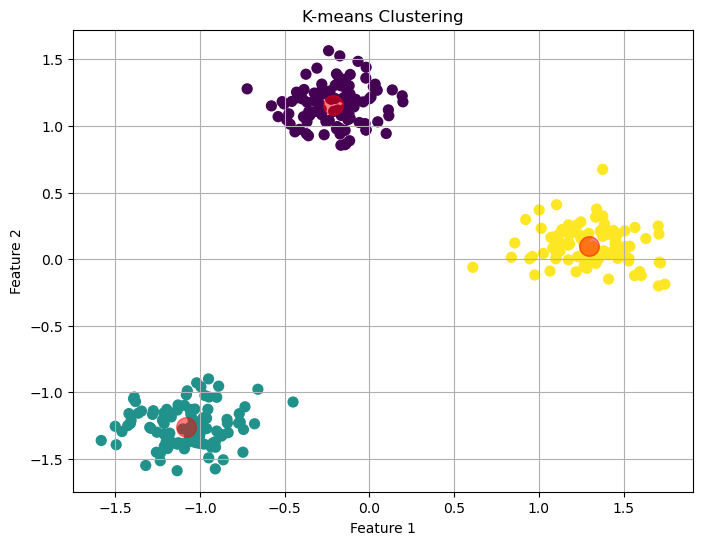

In [7]:
# Plot the clustered data along with the cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [8]:
centers_inverse = scaler.inverse_transform(centers)

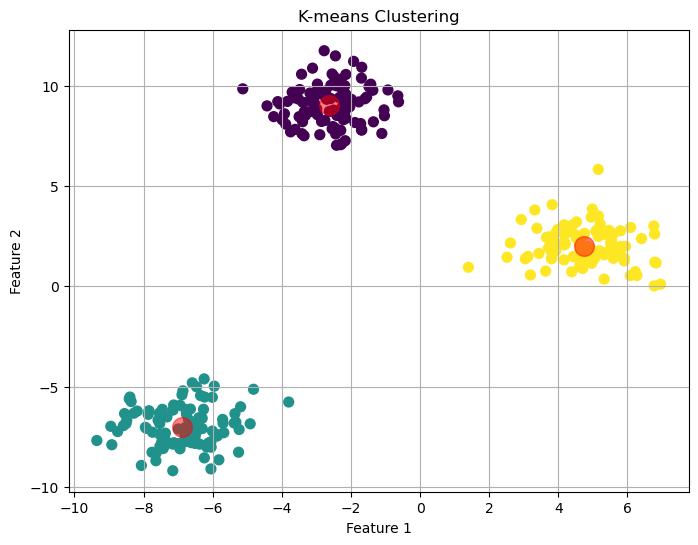

In [9]:
# Plot the clustered data along with the cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_inverse[:, 0], centers_inverse[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Optimal number of clusters

### Elbow Method

In [15]:
wcss = []
for i in range(1, 10):  # trying different number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

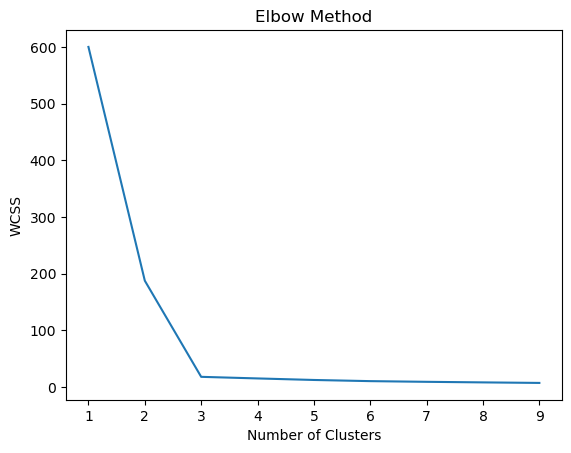

In [16]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score

In [20]:
# Silhouette score
from sklearn.metrics import silhouette_score




silhouettes = []
for i in range(2, 10):  # trying different number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouettes.append(silhouette_avg)
    #wcss.append(kmeans.inertia_)

c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

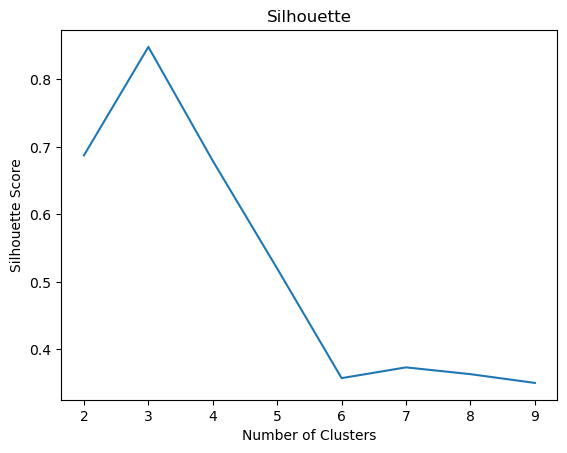

In [23]:
plt.plot(range(2, 10), silhouettes)
plt.title('Silhouette')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()